In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score

In [2]:
#Load the processed dataset
data=pd.read_csv("variable_selection.csv")

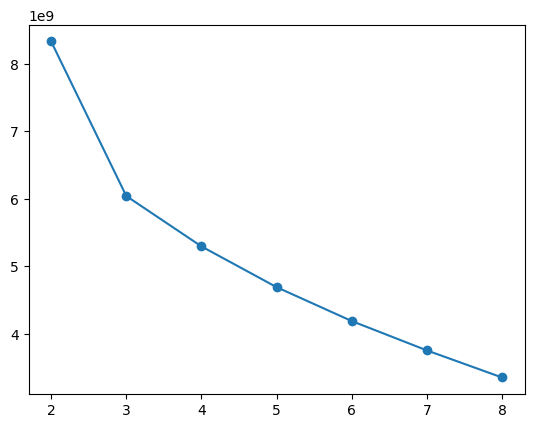

In [10]:
#find k value using within-cluster-sum-of-squares (WCSS)
clusters=[x for x in range(2,9)]
res=[]
for cluster in clusters:
    km=KMeans(init='k-means++',n_clusters=cluster,n_init=90,random_state=10).fit(data)
    res.append(km.inertia_)
plt.plot(clusters,res,marker='o')
plt.show()

In [3]:
#perform clustering
kms=KMeans(init='k-means++',n_clusters=3,n_init=100,random_state=1).fit(data)
labels=pd.DataFrame(kms.labels_)
c_data=data.assign(Cluster=labels)

In [5]:
#cluster data
clusters=pd.DataFrame(data)
clusters['label']=kms.labels_

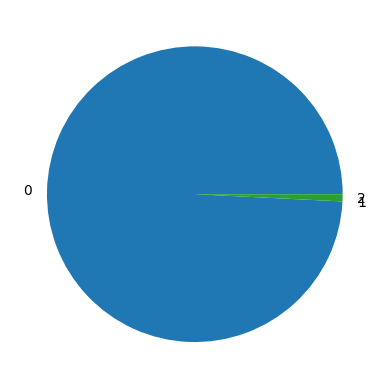

In [9]:
#plot the percentage of the clusters
import matplotlib.pyplot as plt
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
plt.pie(pie['value'],labels=pie['label'])
plt.show()